In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Sri'

In [4]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 330.3 kB/s eta 0:01:58
   ---------------------------------------- 0.1/38.8 MB 825.8 kB/s eta 0:00:47
   ---------------------------------------- 0.1/38.8 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.8 MB 525.1 kB/s eta 0:01:14
   ---------------------------------------- 0.1/38.8 MB 525.1 kB/s eta 0:01:14
   ---------------------------------------- 0.1/38.8 MB 525.1 kB/s eta 0:01:14
   ---------------------------------------- 0.1/38.8 MB 448.2 kB/s eta 0:01:27
   ---------------------------------------- 0.1/38.8 MB 448.2 kB/s eta 0:01:27
   ---------------------------------------- 0.1/38.8 MB 448.2 kB/s eta 0:01:27
   ---------------------------------------- 0.2/38.8 MB 429.5 kB/s eta 0:01:30
   ---------------------------------------- 0.2/38.8 MB 429.5 kB/s eta

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
## Loading the flower dataset

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 293s 1us/step


In [12]:
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
import pathlib

In [10]:
data_dir=pathlib.Path(data_dir)

In [14]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [16]:
image_count

3670

In [19]:
roses = list(data_dir.glob('roses/*'))

In [20]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

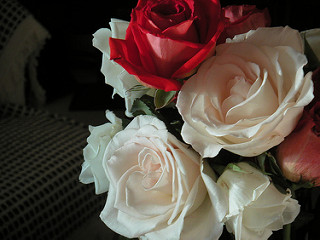

In [22]:
PIL.Image.open(str(roses[1]))

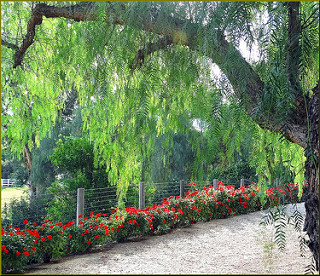

In [23]:
PIL.Image.open(str(roses[5]))

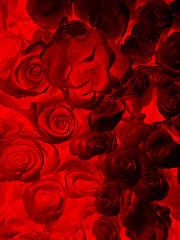

In [24]:
PIL.Image.open(str(roses[4]))

In [25]:
tulips = list(data_dir.glob('tulips/*'))

In [27]:
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

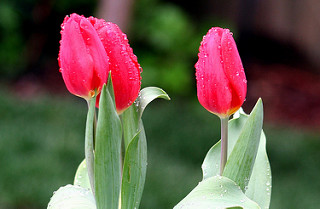

In [28]:
PIL.Image.open(str(tulips[0]))

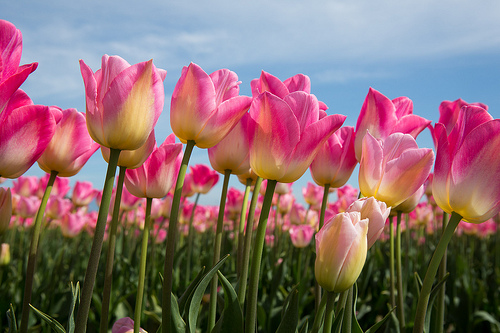

In [29]:
PIL.Image.open(str(tulips[3]))

Read images from disk to numpy array

In [31]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [32]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [33]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

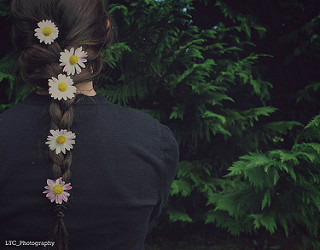

In [35]:
PIL.Image.open(str(flowers_images_dict['daisy'][4]))

In [36]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [37]:
flowers_labels_dict['daisy']

1

In [39]:
flowers_labels_dict.items()

dict_items([('roses', 0), ('daisy', 1), ('dandelion', 2), ('sunflowers', 3), ('tulips', 4)])

In [41]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [42]:
img.shape

(240, 179, 3)

In [43]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [44]:
## Creating the above for whole of x and y 

In [45]:
X,y=[],[]
for flower,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower])
        
    

In [55]:
X.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
y.shape

In [57]:
## Converting the above into a numpy array


In [58]:
X = np.array(X)

In [60]:
y = np.array(y)

In [61]:
## Splitting the data into train test split 

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [64]:
X_train.shape

(2752, 180, 180, 3)

In [65]:
##Scaling the X_train and X_test data to get it on a std scale 

In [67]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [70]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)     

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 357ms/step - accuracy: 0.3983 - loss: 1.4399
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 320ms/step - accuracy: 0.6200 - loss: 1.0226
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 381ms/step - accuracy: 0.7007 - loss: 0.8185
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.7565 - loss: 0.6579
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - accuracy: 0.8403 - loss: 0.4665


In [71]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6600 - loss: 0.9631


[1.0024950504302979, 0.6601307392120361]

 Accuracy with test set is low lets try data augumentation to see if the accuracy improves after we apply augumentation

In [73]:
prediction = model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step


In [74]:
prediction

array([[ 4.314855  ,  7.6606507 ,  2.09161   , -2.8669462 ,  2.7603843 ],
       [ 6.8791575 ,  4.745136  , -2.555849  , -1.7004747 ,  4.1676464 ],
       [ 0.53549874,  2.9042578 ,  8.671048  , -1.8979086 ,  0.98000485],
       ...,
       [ 4.5816917 ,  2.288795  , -1.7144617 ,  4.367185  ,  3.3293476 ],
       [ 4.0349526 ,  1.9558662 , -0.23809329, -1.3820149 ,  2.6040742 ],
       [ 3.2619944 , -3.9351518 ,  3.5401754 ,  5.008547  ,  5.8156977 ]],
      dtype=float32)

In [75]:
score = tf.nn.softmax(prediction[0])

In [76]:
np.argmax(score)

1

In [77]:
y_test[0]

1

In [78]:
## The above prediction is same in this case 

Data Augumentation 

In [81]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180,180,
                                                              3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

C:\Users\Sri\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


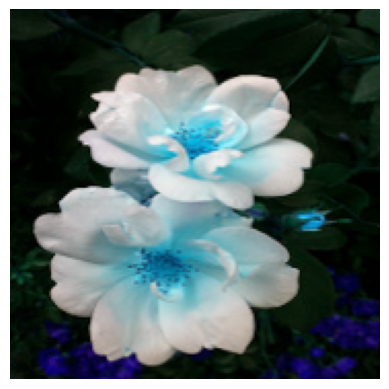

In [82]:
plt.axis('off')
plt.imshow(X[0])

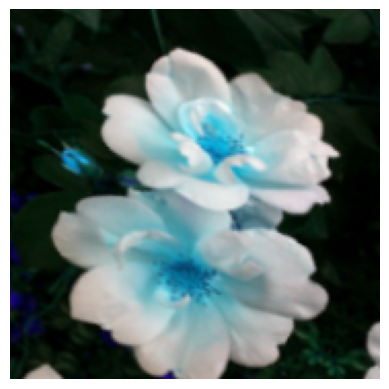

In [85]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [86]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)   

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 376ms/step - accuracy: 0.3185 - loss: 1.5817
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 466ms/step - accuracy: 0.5428 - loss: 1.1059
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 437ms/step - accuracy: 0.6330 - loss: 0.9759
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 348ms/step - accuracy: 0.6564 - loss: 0.8904
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 351ms/step - accuracy: 0.6497 - loss: 0.8809


In [87]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6526 - loss: 0.9654


[0.9823631644248962, 0.6514161229133606]

In [88]:
## After running data augumentation we see both the models are almost performing similarly 